# Gradient Boosting Machine

In [38]:
#Add libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [39]:
#Get data
iris= datasets.load_iris()

In [40]:
#View categories
dir(iris)

#Convert to data
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
#Look at names of targets
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:

df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Feature Engineering

In [44]:
# Check data types
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [45]:
# Check missing values in X_train
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
flower_name          0
dtype: int64

In [46]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


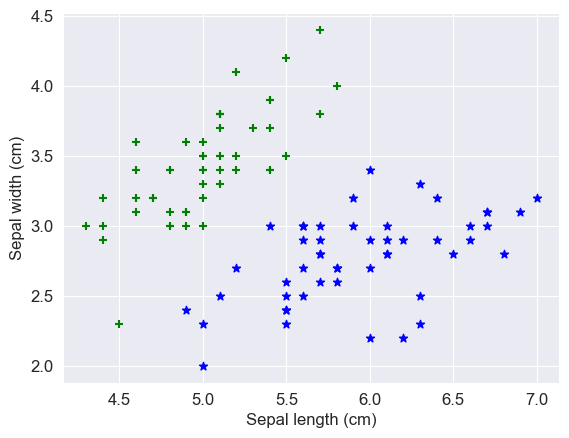

In [48]:
#Plot a scatter plot of two of the iris species
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue',marker='*')

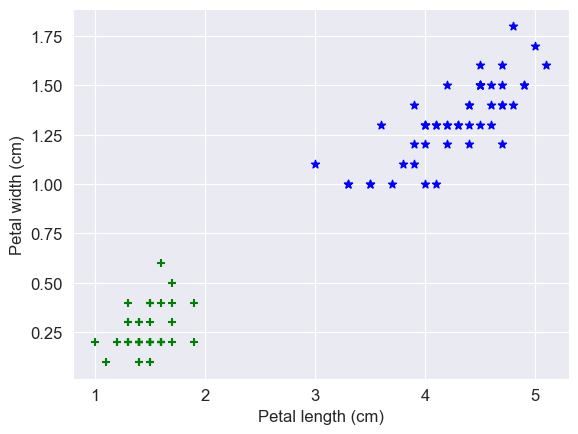

In [49]:
#Plot a scatter plot of two of the iris species
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue',marker='*')

### Split Data

In [50]:
X = df.drop(['target','flower_name'], axis='columns')
Y = df['target']

In [51]:
#Split data into separate training and test and test set
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

### Training Classifier

In [52]:
model = XGBClassifier()

# Fit the model
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Predict the Results

In [53]:
Y_pred = model.predict(X_test)

Y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

### Check Accuracy Score

In [54]:
print('Model accuracy score: {0:0.4f}'.format(model.score(X_test,Y_test)))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)))

Y_pred_train = model.predict(X_train)
Y_pred_train

Model accuracy score: 0.9778
Model accuracy score: 0.9778


array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0], dtype=int64)

In [55]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(Y_train, Y_pred_train)))

# Print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.9778


In [56]:
# Check class distribution in test set
null_info = Y_test.value_counts()
null_info

target
1    18
0    16
2    11
Name: count, dtype: int64

In [57]:
# Check Null Accuracy Score
null_accuracy = null_info.iloc[0] / (null_info.iloc[0] + null_info.iloc[1])
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.5294


In [58]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

True Positives(TP) =  16

True Negatives(TN) =  17

False Positives(FP) =  0

False Negatives(FN) =  0


<Axes: >

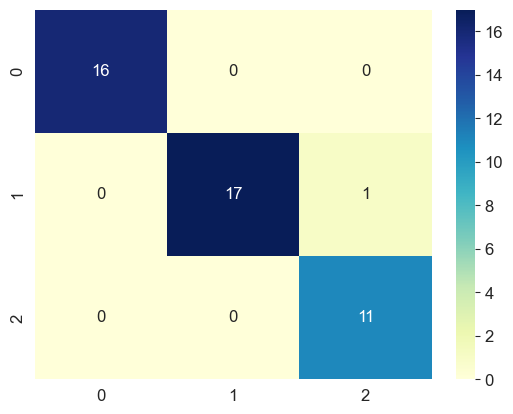

In [59]:
# Visualise confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [60]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [61]:
# Print classification accuracy

TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [62]:
# Print Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [63]:
#Print Precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [64]:
#Print Recall
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [65]:
#True positive Rate
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

True Positive Rate : 1.0000


In [66]:
#False positive rate
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

False Positive Rate : 0.0000


In [67]:
#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


### Calculate Class Probabilities

In [68]:
# Print the first 10 predicted probabilities of two classes- 0 and 1

Y_pred_prob = model.predict_proba(X_test)[0:10]
Y_pred_prob

array([[1.8342044e-03, 1.4223084e-03, 9.9674350e-01],
       [3.8903772e-03, 9.8142129e-01, 1.4688376e-02],
       [9.8834467e-01, 1.0407429e-02, 1.2478908e-03],
       [5.4910558e-04, 2.1708675e-03, 9.9728000e-01],
       [9.9380445e-01, 4.9408185e-03, 1.2547843e-03],
       [1.0693744e-03, 3.9168461e-03, 9.9501377e-01],
       [9.9380445e-01, 4.9408185e-03, 1.2547843e-03],
       [9.5295761e-04, 9.9680799e-01, 2.2389658e-03],
       [8.6359249e-04, 9.9581832e-01, 3.3181675e-03],
       [8.5086795e-04, 9.9587989e-01, 3.2692761e-03]], dtype=float32)

In [69]:
# Store the probabilities in dataframe
Y_pred_prob_df = pd.DataFrame(data=Y_pred_prob, columns=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
Y_pred_prob_df

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.001834,0.001422,0.996744
1,0.003890,0.981421,0.014688
2,0.988345,0.010407,0.001248
3,0.000549,0.002171,0.997280
4,0.993804,0.004941,0.001255
5,0.001069,0.003917,0.995014
6,0.993804,0.004941,0.001255
7,0.000953,0.996808,0.002239
8,0.000864,0.995818,0.003318
9,0.000851,0.995880,0.003269


In [70]:
# Print the first 10 predicted probabilities for class 1 - Probability of stroke
model.predict_proba(X_test)[0:10, 1]

array([0.00142231, 0.9814213 , 0.01040743, 0.00217087, 0.00494082,
       0.00391685, 0.00494082, 0.996808  , 0.9958183 , 0.9958799 ],
      dtype=float32)

In [71]:
# Store the predicted probabilities for class 1 - Probability of stroke
Y_pred1 = model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

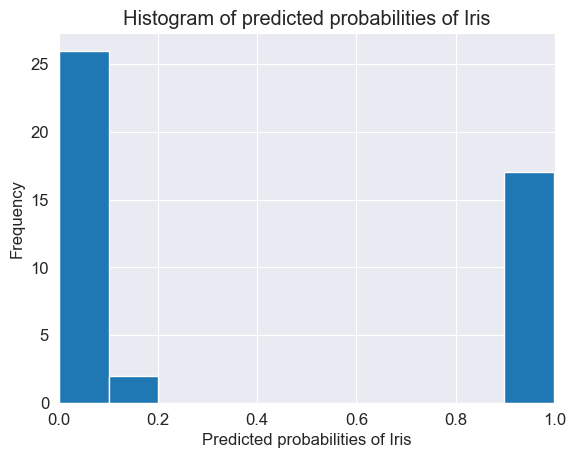

In [72]:
# Plot histogram of predicted probabilities

# adjust the font size
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(Y_pred1, bins=10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Iris')

# set the x-axis limit
plt.xlim(0, 1)

# set the title
plt.xlabel('Predicted probabilities of Iris')
plt.ylabel('Frequency')

### Cross Validation Score

In [73]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.90909091 1.         0.90909091 1.         1.         1.
 1.         0.8        1.         0.9       ]


In [74]:
# Compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9518
